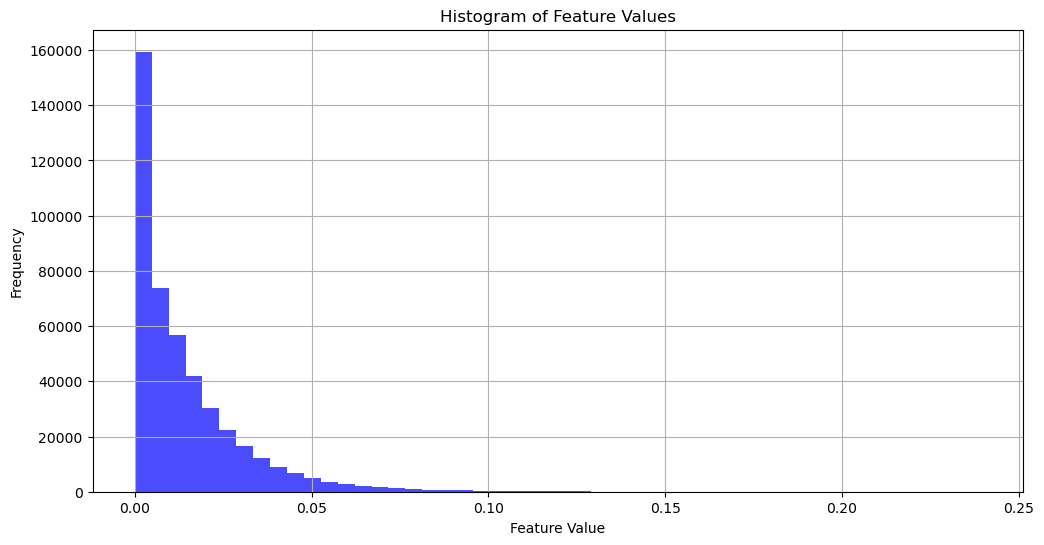

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  
import pickle  

with open('embeddings.pkl', 'rb') as f:  
    feature_list = pickle.load(f)  
all_features = np.concatenate(feature_list)  

# Plot the histogram  
plt.figure(figsize=(12, 6))  
plt.hist(all_features, bins=50, color='blue', alpha=0.7)  
plt.title('Histogram of Feature Values')  
plt.xlabel('Feature Value')  
plt.ylabel('Frequency')  
plt.grid()  
plt.show()

No missing values in embeddings data.
No missing filenames.


Shape of embeddings: (220, 2048)
Number of files: 220


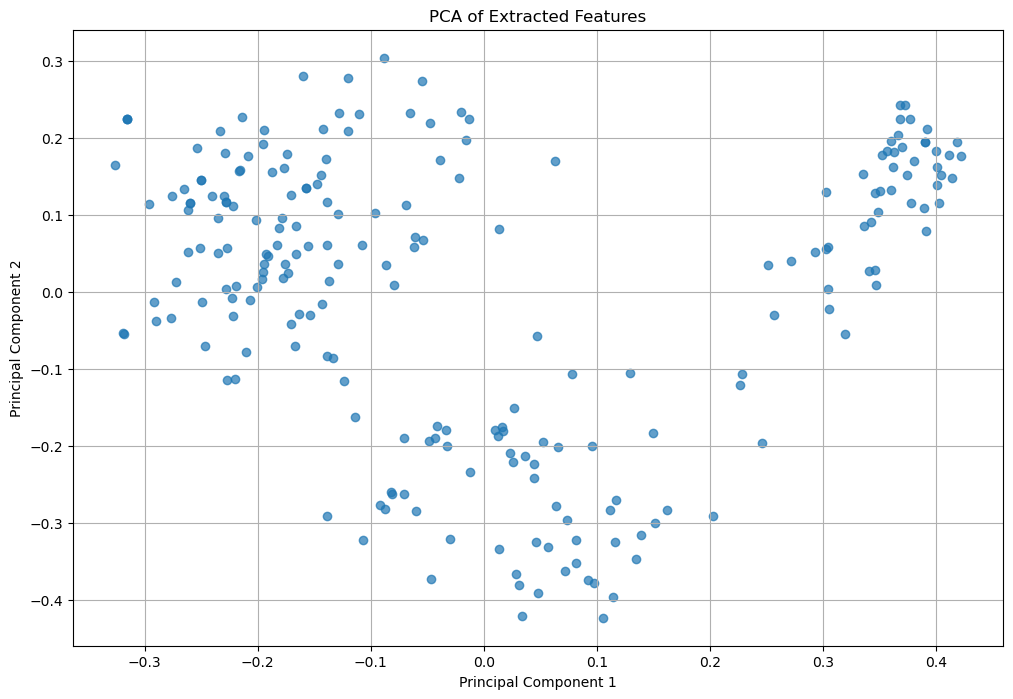

In [8]:
from sklearn.decomposition import PCA  

features_array = np.array(feature_list)  

pca = PCA(n_components=2)  
features_pca = pca.fit_transform(features_array)  

plt.figure(figsize=(12, 8))  
plt.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.7)  
plt.title('PCA of Extracted Features')  
plt.xlabel('Principal Component 1')  
plt.ylabel('Principal Component 2')  
plt.grid()  
plt.show()


In [9]:

with open('pca_features.pkl', 'wb') as f:  
    pickle.dump(features_pca, f)

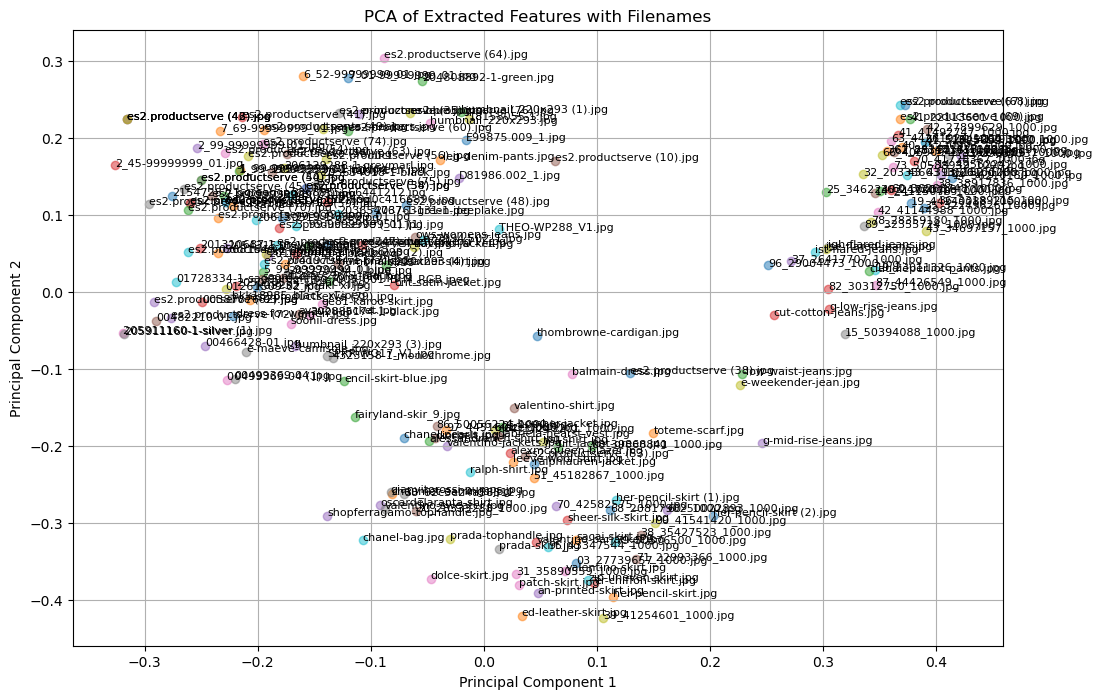

In [10]:

# with open('filenames.pkl', 'rb') as f:  
#     filenames = pickle.load(f)  
  
# plt.figure(figsize=(12, 8))  
# for i in range(len(features_pca)):  
#     plt.scatter(features_pca[i, 0], features_pca[i, 1], alpha=0.5)  
#     plt.text(features_pca[i, 0], features_pca[i, 1], filenames[i].split('\\')[-1], fontsize=8)  
# plt.title('PCA of Extracted Features with Filenames')  
# plt.xlabel('Principal Component 1')  
# plt.ylabel('Principal Component 2')  
# plt.grid()  
# plt.show()

c:\Users\arifu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


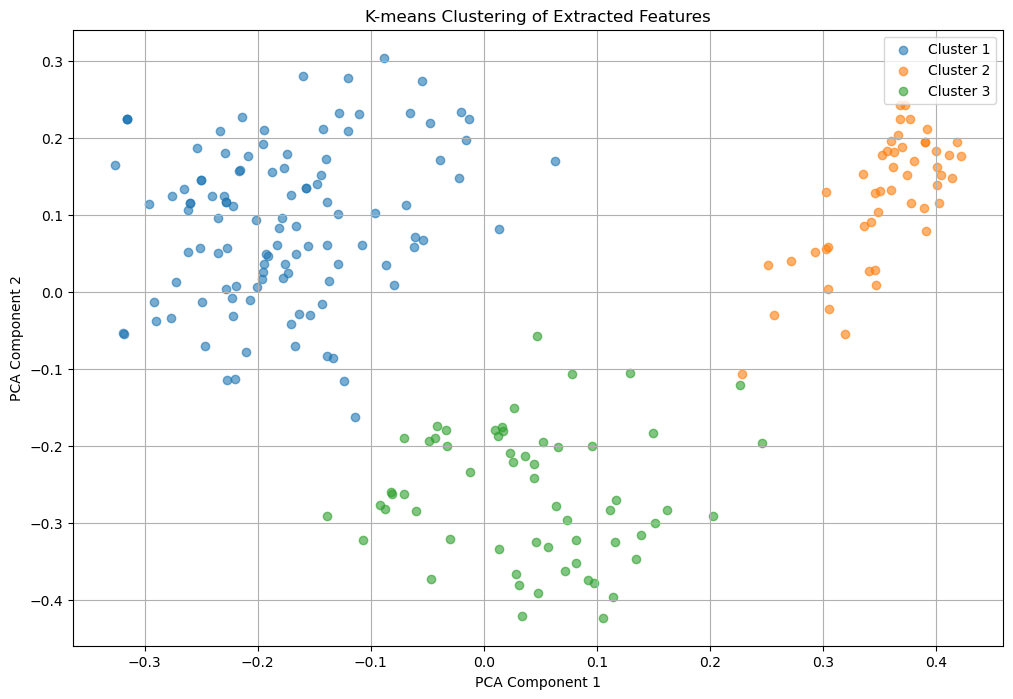

In [18]:

from sklearn.decomposition import PCA  
from sklearn.cluster import KMeans  
import pickle  

with open('embeddings.pkl', 'rb') as f:  
    feature_list = pickle.load(f)  

features_array = np.array(feature_list)  

num_clusters = 3   
kmeans = KMeans(n_clusters=num_clusters, random_state=42)  
clusters=kmeans.fit(features_array)  

labels = kmeans.labels_  

pca = PCA(n_components=2)  
features_pca = pca.fit_transform(features_array)  
plt.figure(figsize=(12, 8))  
for i in range(num_clusters):  
    plt.scatter(features_pca[labels == i, 0], features_pca[labels == i, 1], label=f'Cluster {i+1}', alpha=0.6)  

plt.title('K-means Clustering of Extracted Features')  
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  
plt.legend()  
plt.grid()  
plt.show()
plt.show()


In [24]:

mean_embedding = np.mean(embeddings, axis=0)
std_embedding = np.std(embeddings, axis=0)

print("Mean of embeddings:", mean_embedding)
print("Standard deviation of embeddings:", std_embedding)


Mean of embeddings: [0.0144644  0.024343   0.00355227 ... 0.01086311 0.01527703 0.03401058]
Standard deviation of embeddings: [0.00960768 0.01574473 0.0058916  ... 0.01015105 0.01309138 0.01888061]


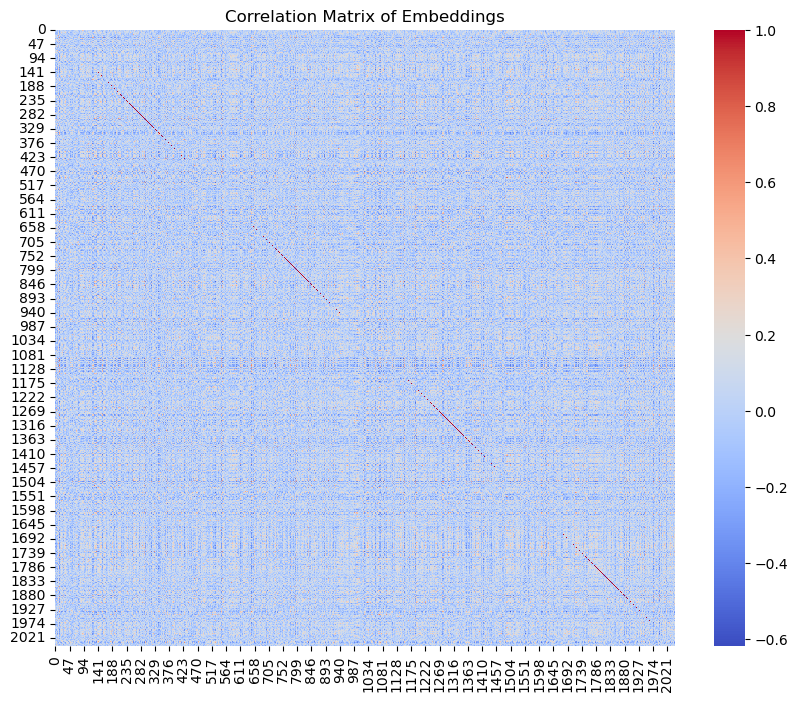

In [25]:
import seaborn as sns
import pandas as pd

embeddings_df = pd.DataFrame(embeddings)

corr_matrix = embeddings_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Embeddings')
plt.show()
